Karar ağacı ile sınıflandırma ve regresyon modeli oluşturma

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import joblib

In [9]:
#Irıs veriseti yükleme
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target
iris.head()
#df=pd.read_csv("iris.csv")
#df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


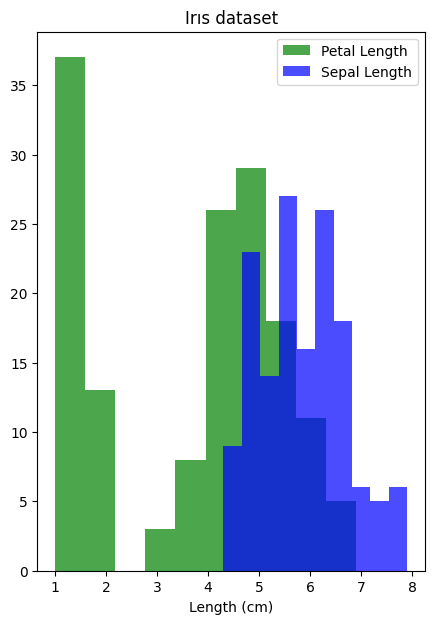

In [11]:
#Sepal length ve petal lenght dağılımı
plt.figure(figsize=(5,7))
plt.hist(iris['petal length (cm)'],color='green',alpha=0.7,label='Petal Length')
plt.hist(iris['sepal length (cm)'],color='blue',alpha=0.7,label='Sepal Length')
plt.title('Irıs dataset')
plt.xlabel('Length (cm)')
plt.legend()
plt.show()

In [14]:
X=iris[['sepal length (cm)']]
y=iris[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print("Eğitim seti boyutu: ",X_train.shape,y_train.shape)
print("Test seti boyutu: ",X_test.shape,y_test.shape)

Eğitim seti boyutu:  (90, 1) (90, 1)
Test seti boyutu:  (60, 1) (60, 1)


In [17]:
#Karar ağacı modeli eğitme
#Karar ağacı sınıflandırcı (DecisionTreeClassifier)
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
#criterion='entropy'daha hasas olan /criterion='gini'performansı hızlandıran

#Modeli eğitme
dtc.fit(X_train,y_train)
print("Eğitilmiş model : ",dtc)

Eğitilmiş model :  DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


In [18]:
#Test verisiyle tahmin yapma
y_pred=dtc.predict(X_test)

#Karışıklık matrisi
cm=confusion_matrix(y_test,y_pred)
print("Karışıklık matrisi : \n",cm)

Karışıklık matrisi : 
 [[17  6  0]
 [ 1  9  9]
 [ 0  1 17]]


In [19]:
#Karar ağacı regresyon modeli
X_reg=iris[['petal length (cm)']]
y_reg=iris[['sepal length (cm)']]

#Eğitim ve test setlerini ayırma
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.25,random_state=42)
print("Eğitim seti boyutu: ",X_train_reg.shape,y_train_reg.shape)
print("Test seti boyutu: ",X_test_reg.shape,y_test_reg.shape)

Eğitim seti boyutu:  (112, 1) (112, 1)
Test seti boyutu:  (38, 1) (38, 1)


In [20]:
#Modeli eğitme
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
dtr.fit(X_train_reg,y_train_reg)
print("Eğitilmiş model : ",dtr)

Eğitilmiş model :  DecisionTreeRegressor(max_depth=4, random_state=42)


In [23]:
#Modeli test etme
y_pred_reg=dtr.predict(X_test_reg)

#İlk 5 tahmin ve gerçek değerlerin tahmini
print("Tahmin edilen değerler : ",y_pred_reg[:5])
print("Gerçek değerler : ",y_test_reg.head())

#Hata hesaplama
mse=mean_squared_error(y_test_reg,y_pred_reg)
print("Ortalama karesel hata : ",mse)

Tahmin edilen değerler :  [6.19090909 4.99428571 7.66666667 5.475      6.19090909]
Gerçek değerler :       sepal length (cm)
73                 6.1
18                 5.7
118                7.7
78                 6.0
76                 6.8
Ortalama karesel hata :  0.1652951017350539


Hiperparametre Ayarlama

In [29]:
#Grid Search
from sklearn.model_selection import GridSearchCV
#Hiperparametre aralıkları
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,3,5]
}
#Grid Search Uygulaması
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid_search.fit(X_train,y_train)

print("En iyi parametreler: ",grid_search.best_params_)
y_pred_grid=grid_search.predict(X_test)
cm_grid=confusion_matrix(y_test,y_pred_grid)
print("Karışıklık matrisi : \n",cm_grid)


En iyi parametreler:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Karışıklık matrisi : 
 [[20  3  0]
 [ 1 11  7]
 [ 0  2 16]]


In [28]:
best_params=grid_search.best_params_
optimized_dtc=DecisionTreeClassifier(**best_params,random_state=42)
optimized_dtc.fit(X_train,y_train)

#Test Seti performansını kontrol etme
y_pred_optimized=optimized_dtc.predict(X_test)
cm_optimized=confusion_matrix(y_test,y_pred_optimized)
print("Karışıklık matrisi : \n",cm_optimized)

Karışıklık matrisi : 
 [[20  3  0]
 [ 1 11  7]
 [ 0  2 16]]


In [30]:
#Modeli kaydetme
joblib.dump(optimized_dtc,'optimized_dtc_model.pkl')
print("Model kaydedildi")

Model kaydedildi


In [31]:
#Kaydedilmiş modeli yükleme ve test etme
loaded_model=joblib.load('optimized_dtc_model.pkl')
y_pred_loaded=loaded_model.predict(X_test)

#performansı kontrol etme
cm_loaded=confusion_matrix(y_test,y_pred_loaded)
print("Karışıklık matrisi : \n",cm_loaded)


Karışıklık matrisi : 
 [[20  3  0]
 [ 1 11  7]
 [ 0  2 16]]
